![(book cover)](https://covers.oreillystatic.com/images/0636920167433/cat.gif "(book cover)")
### **Programming Quantum Computers** by O'Reilly Media -  [**book Info**](http://shop.oreilly.com/product/0636920167433.do)  - [**all code samples**](https://oreilly-qc.github.io)

#### **Code samples for Chapter 7**
These code samples were written by Eric Johnston, Nic Harrigan, and Mercedes Gimeno-Segovia.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
%matplotlib inline

|8> (1+0j) probability = 100.0%


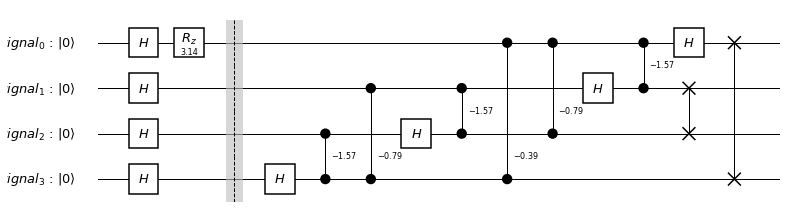

In [3]:
## Example 7-1: QFT to distinguish 3 states

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

def main():
    which_signal = 'A'  # Change this to test the different signals in the book

    ## prepare the signal
    qc.h(signal);
    if which_signal == 'A':
        qc.rz(math.radians(180), signal[0]);
    elif which_signal == 'B':
        qc.rz(math.radians(90), signal[0])
        qc.rz(math.radians(180), signal[1])
    elif which_signal == 'C':
        qc.rz(math.radians(45), signal[0])
        qc.rz(math.radians(90), signal[1])
        qc.rz(math.radians(180), signal[2])

    qc.barrier()
    QFT(signal)


def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


|2> (1+0j) probability = 100.0%


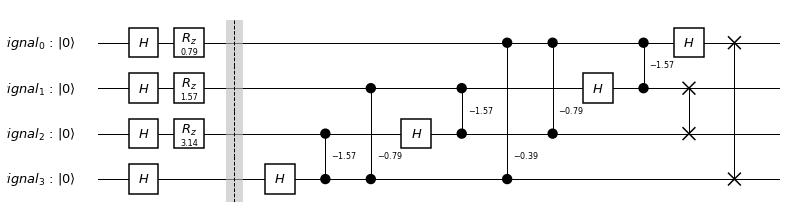

In [6]:
## Example 7-2: QFT of simple QPU signal

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

def main():
    ## prepare the signal
    qc.h(signal);
    qc.rz(math.radians(45), signal[0]);
    qc.rz(math.radians(90), signal[1]);
    qc.rz(math.radians(180), signal[2]);

    qc.barrier()
    QFT(signal)


def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


|4> (0.5-0.5j) probability = 50.0%
|12> (0.5+0.5j) probability = 50.0%


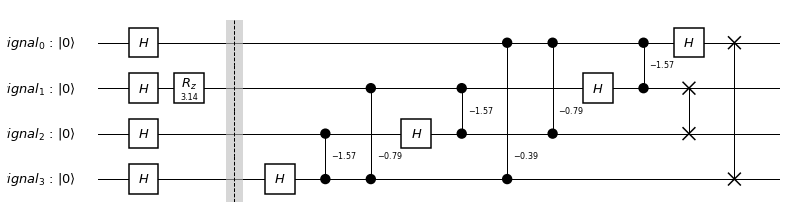

In [7]:
## Example 7-3: QFT square wave

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

def main():
    ## prepare the signal
    qc.h(signal);
    qc.rz(math.radians(180), signal[1]);

    qc.barrier()
    QFT(signal)


def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


|8> (0.062-0.635j) probability = 40.7069%
|24> (0.062-0.206j) probability = 4.628%
|40> (0.063-0.117j) probability = 1.7658%
|56> (0.062-0.076j) probability = 0.962%
|72> (0.063-0.051j) probability = 0.657%
|88> (0.062-0.033j) probability = 0.4933%
|104> (0.063-0.019j) probability = 0.433%
|120> (0.063-0.006j) probability = 0.4005%
|136> (0.063+0.006j) probability = 0.4005%
|152> (0.062+0.019j) probability = 0.4205%
|168> (0.062+0.033j) probability = 0.4933%
|184> (0.063+0.051j) probability = 0.657%
|200> (0.063+0.076j) probability = 0.9745%
|216> (0.062+0.117j) probability = 1.7533%
|232> (0.062+0.206j) probability = 4.628%
|248> (0.063+0.635j) probability = 40.7194%


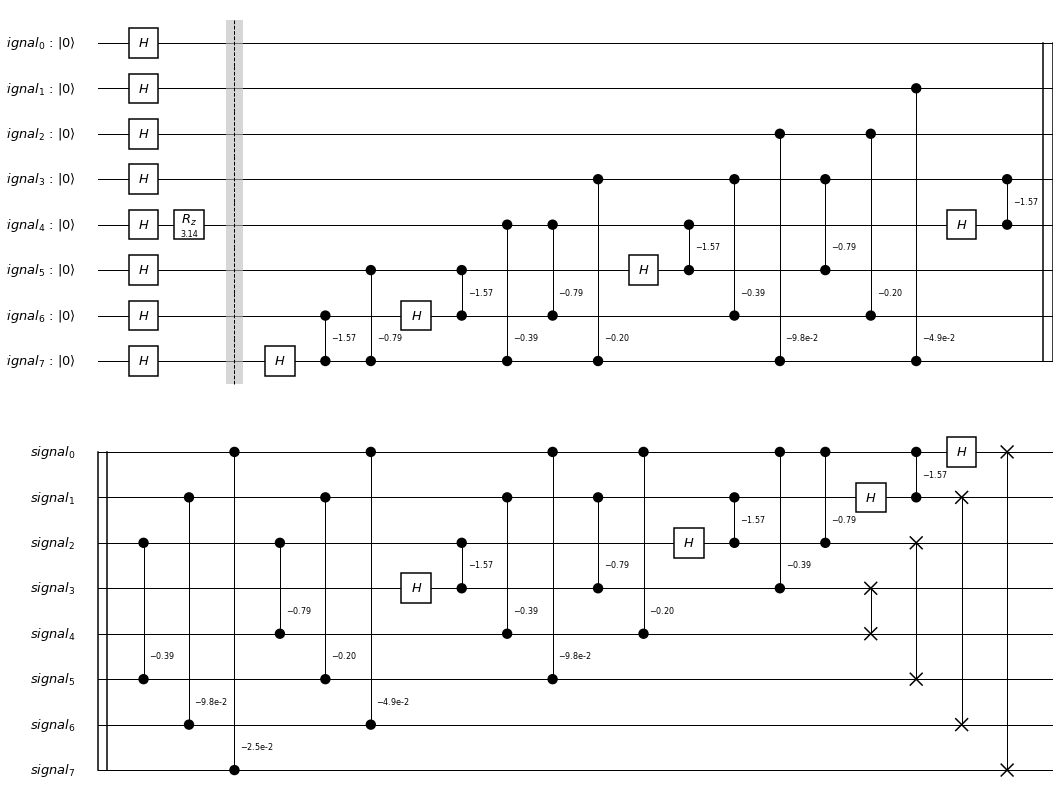

In [11]:
## Example 7-4: QFT big square wave

# Set up the program
signal = QuantumRegister(8, name='signal')
qc = QuantumCircuit(signal)

def main():
    ## prepare the signal
    qc.h(signal);
    qc.rz(math.radians(180), signal[4]);

    qc.barrier()
    QFT(signal)


def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


In [9]:
## Example 7-5: QFT frequency to state

# (coming soon! just implementing invQFT)

In [10]:
## Example 7-6: QFT prepare a state

# (coming soon! just implementing invQFT)

|0> (0.25+0j) probability = 6.25%
|1> (0.235+0.086j) probability = 6.2621%
|2> (0.192+0.161j) probability = 6.2785%
|3> (0.125+0.217j) probability = 6.2714%
|4> (0.043+0.246j) probability = 6.2365%
|5> (-0.043+0.246j) probability = 6.2365%
|6> (-0.125+0.217j) probability = 6.2714%
|7> (-0.192+0.161j) probability = 6.2785%
|8> (-0.235+0.086j) probability = 6.2621%
|9> (-0.25+0j) probability = 6.25%
|10> (-0.235-0.086j) probability = 6.2621%
|11> (-0.192-0.161j) probability = 6.2785%
|12> (-0.125-0.217j) probability = 6.2714%
|13> (-0.043-0.246j) probability = 6.2365%
|14> (0.043-0.246j) probability = 6.2365%
|15> (0.125-0.217j) probability = 6.2714%


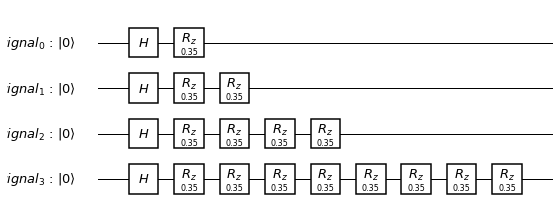

In [13]:
## Example 7-7: Frequency manipulation

# (coming soon! just implementing invQFT)

|0> (0.25+0j) probability = 6.25%
|1> (0.235+0.086j) probability = 6.2621%
|2> (0.192+0.161j) probability = 6.2785%
|3> (0.125+0.217j) probability = 6.2714%
|4> (0.043+0.246j) probability = 6.2365%
|5> (-0.043+0.246j) probability = 6.2365%
|6> (-0.125+0.217j) probability = 6.2714%
|7> (-0.192+0.161j) probability = 6.2785%
|8> (-0.235+0.086j) probability = 6.2621%
|9> (-0.25+0j) probability = 6.25%
|10> (-0.235-0.086j) probability = 6.2621%
|11> (-0.192-0.161j) probability = 6.2785%
|12> (-0.125-0.217j) probability = 6.2714%
|13> (-0.043-0.246j) probability = 6.2365%
|14> (0.043-0.246j) probability = 6.2365%
|15> (0.125-0.217j) probability = 6.2714%


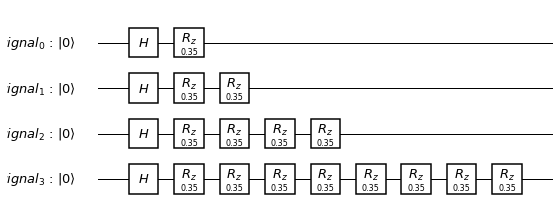

In [14]:
## Example 7-8: QFT rotating phases

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

def main():

    ## Rotate kth state in register by k times 20 degrees
    phi = 20;

    ## First HAD so that we can see the result for all k values at once
    qc.h(signal);

    ## Apply 2^k phase operations to kth qubit
    for i in range(4):
        val = 1 << i
        for j in range(val):
            qc.rz(math.radians(phi), signal[i]);

def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit
